# Boston Bluebikes data
## by Torben Flickinger

## Investigation Overview



## Dataset Overview

Bluebikes is Metro Boston's public bike share program, with more than 1,800 bikes at over 200 stations across Boston, Brookline, Cambridge and Somerville. Bluebikes is owned by the municipalities of Boston, Brookline, Cambridge and Somerville, and operated by Motivate. Bluebikes publishes trip data regularly on https://www.bluebikes.com/system-data . For my analysis I downloaded the trip data for all months of 2019. 
To be able to investigate possible relationships of the use of this service to weather data, I additionally downloaded a dataset with historical weather data for Boston from the National Oceanic and athmospheric Administration https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00014739/detail.


In [1]:
import numpy as np

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)

import re # library for regular expressions



# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('fivethirtyeight')

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [11]:
df_clean = pd.read_csv("./data/clean_data.csv", parse_dates=['starttime', 'stoptime','date'], index_col='index' ).drop('Unnamed: 0', axis=1)
df_clean.head()

C:\Users\norma\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,date,day,week,hour,dayofweek,age,distance,agegroup,rushhour,route,purpose,PRCP,TMAX
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,371,2019-01-01 00:09:13.798,2019-01-01 00:15:25.336,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3689,Subscriber,1987,1,1,2019-01-01,1,1,0,1,32,1279.134116,26-35,False,"80,179",Unknown,9.7,15.0
6,304,2019-01-01 00:54:48.931,2019-01-01 00:59:53.581,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,3861,Subscriber,1991,1,1,2019-01-01,1,1,0,1,28,1279.134116,26-35,False,"80,179",Unknown,9.7,15.0
1111,354,2019-01-01 17:54:32.797,2019-01-01 18:00:26.842,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,4053,Subscriber,1990,1,1,2019-01-01,1,1,17,1,29,1279.134116,26-35,True,"80,179",Unknown,9.7,15.0
1114,397,2019-01-01 17:57:05.568,2019-01-01 18:03:43.000,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,4160,Subscriber,1987,1,1,2019-01-01,1,1,17,1,32,1279.134116,26-35,True,"80,179",Unknown,9.7,15.0
1140,320,2019-01-01 18:33:41.350,2019-01-01 18:39:01.927,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,179,MIT Vassar St,42.355601,-71.103945,2893,Subscriber,1985,1,1,2019-01-01,1,1,18,1,34,1279.134116,26-35,True,"80,179",Unknown,9.7,15.0


In [13]:
df_clean.shape

(2522537, 29)

In [21]:
df_clean['agegroup'] = df_clean['agegroup'].astype('category')
df_clean['agegroup']

index
0        26-35
6        26-35
1111     26-35
1114     26-35
1140     26-35
         ...  
48147    15-25
48151    15-25
48158    26-35
48180    26-35
48188    36-45
Name: agegroup, Length: 2522537, dtype: category
Categories (8, object): [15-25, 26-35, 36-45, 46-55, 56-65, 66-75, 76-85, >85]

## Number of trips by month and user type
As we might have expected we observe in the first figure how the usage of the service gradually increases in the course of a year until it reaches a peak in September, when there are about five times as many rides as in the winter months. We also realize that the service is mainly used as a subscription service and the usage of user type 'customers' reaches its maximum one month ahead of subscribers in the middle of summer. The latter fact might be a first hint that the user type customer are taking their rides as a recreational activity.

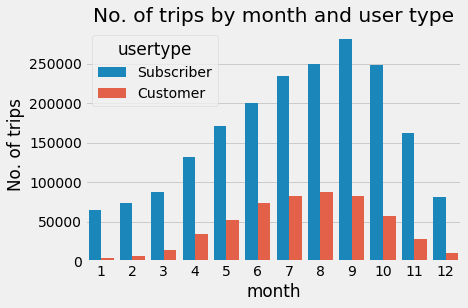

In [28]:
ax =sns.countplot(data=df_clean, x='month', hue='usertype')
ax.set_ylabel('No. of trips')
_ = ax.set_title('No. of trips by month and user type')

## Number of trips by gender

In 2019 the bike share service was far more popular with male users as can bee seen in the next bar chart.

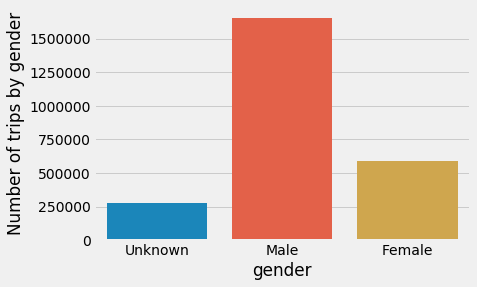

In [16]:
ax = sns.countplot(data=df_clean, x='gender')
ax.set_ylabel('Number of trips by gender')
_ = ax.set_xticklabels(['Unknown', 'Male', 'Female'])

## Number of trips by age groups and month

The service is overwhelmingly used by young people between 15 and 35. Besides other factors this could be due to the popular universites Harvard and MIT with
their numerous students and employees in this age group.

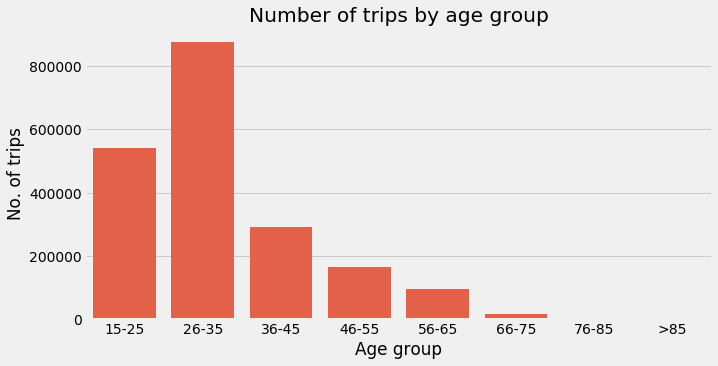

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='agegroup', data=df_clean[df_clean.usertype=='Subscriber'], color='C1')
ax.set_ylabel('No. of trips')
ax.set_xlabel('Age group')
_ = ax.set_title('Number of trips by age group')

## Number of trips by user type and day of week
Subscribers can be considered far more active on weekdays than at weekends. The opposite seems to be true for *customers* which might be another indication that trips of customers are more likely being a recreational activity.

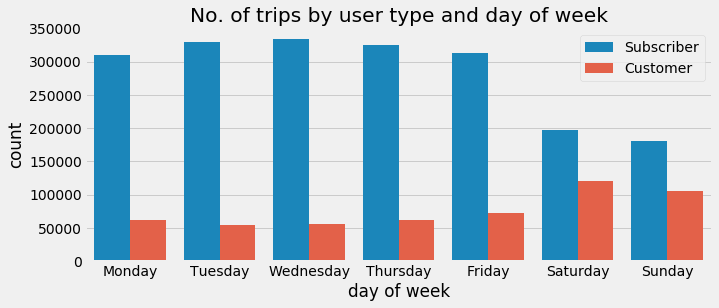

In [34]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='dayofweek', data=df_clean, hue='usertype')
ax.set_xlabel('day of week')
ax.legend()
ax.set_title('No. of trips by user type and day of week')
_ = ax.set_xticklabels( ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Trips on working days
For subscribers we notice a strong bimodal pattern when plotting the number of trips against the hour of working days. This indicates a strong pattern of commuting. The customers seem to be more active towards the evening, again suggesting a stronger usage as pastime activity.

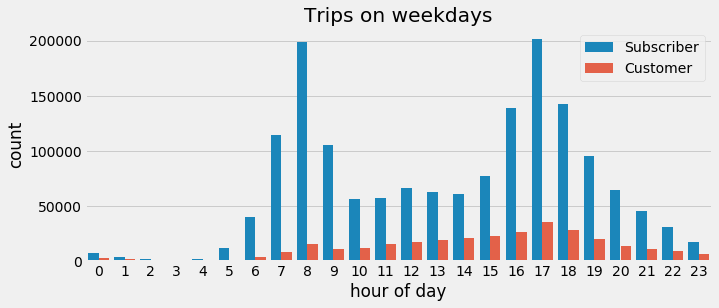

In [35]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='hour', data=df_clean[df_clean['dayofweek'] < 5], hue='usertype', palette ={"Subscriber":"C0","Customer":"C1"})
ax.legend()
ax.set_xlabel('hour of day')
_ = ax.set_title('Trips on weekdays')

In [57]:
# skipping cell, needed for collecting the most popular stations
df_end_stations_pop = df_clean.groupby(['end station name', 'end station id', 'end station longitude',  'end station latitude']).size().reset_index().rename({0:'cnt'}, axis=1).nlargest(10,'cnt')
df_start_stations = df_clean.groupby(['start station name', 'start station id', 'start station longitude',  'start station latitude']).size().reset_index().rename({0:'cnt'}, axis=1)

## The most popular stations
The following figure shows the usage of the 10 most popular destination station over the course of the day and shows some interesting patterns when
adding the usage as start station as well. Some of the stations show striking unimodal peaks during specific daytimes while other have a more bimodal or more even distribution. 
Along with the data for usage as start stations we can often make out corresponding peaks for locations like Ames Street, a main destination in the morning hours and a popular start location in the afternoon, or Nashua Street, a main destination in the after noon and frequently used as start station in the morning. The latter bike station is next to Boston's North station, a crucial node in Boston's public transport system. South Station, another important junction, is showing bimodal distributions indicating arrivals and departures of commuters in the morning as well as in the afternoon. 

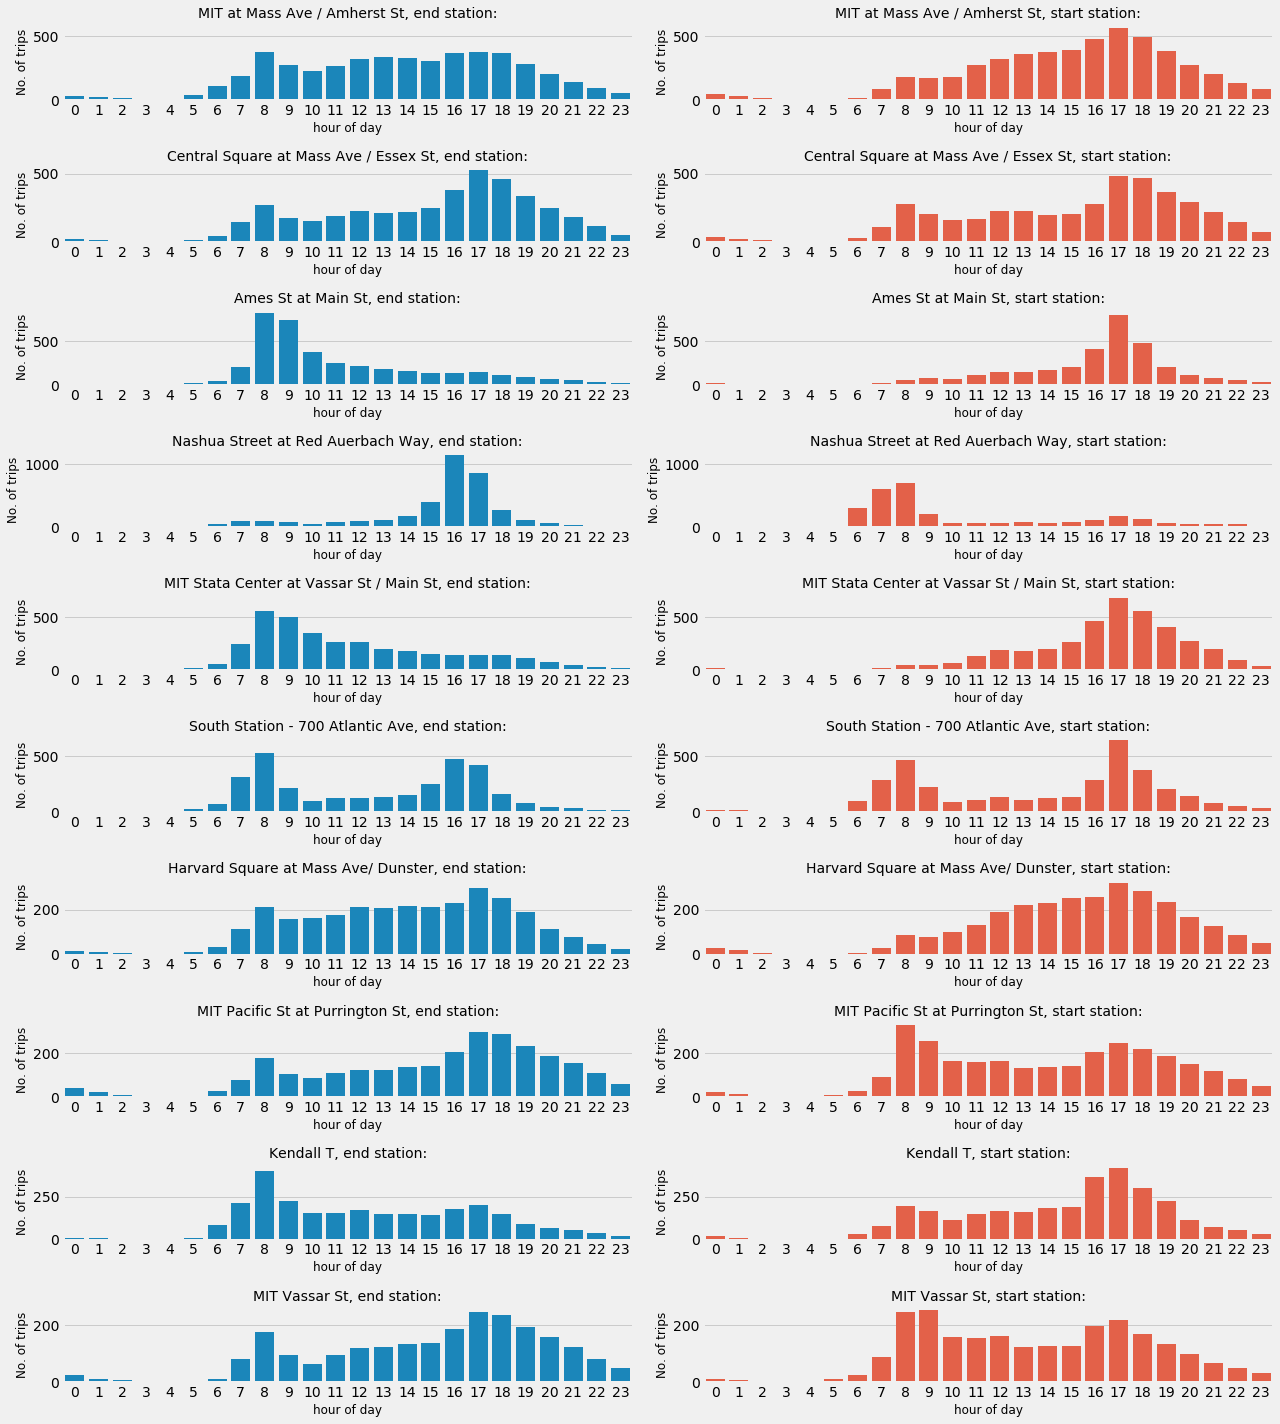

In [60]:
df_end = df_clean[df_clean['end station id'].isin(df_end_stations_pop['end station id'].values)].groupby(['hour', 'end station name', 'end station id', 'month']).size().reset_index().rename({0:'cnt'}, axis=1)
df_start = df_clean[df_clean['start station id'].isin(df_end_stations_pop['end station id'].values)].groupby(['hour', 'start station name', 'start station id', 'month']).size().reset_index().rename({0:'cnt'}, axis=1)
 
fig, ax = plt.subplots(10,2, figsize=(18,20), sharey='row')
for i, s_id in enumerate(zip(df_end_stations_pop['end station id'], df_end_stations_pop[ 'end station name'].values), 1):
    #print(s_id[1])
    plt.subplot(10,2,(i-1)*2 + 1)
    ax1 = sns.barplot(data=df_end[df_end['end station id']==s_id[0]], y='cnt', x='hour', label='end station name', ci=None, color="C0")
    ax1.set_title(s_id[1] + ", end station:", fontsize=14)
    ax1.set_xlabel('hour of day', fontsize=12)
    ax1.set_ylabel('No. of trips', fontsize=12)
    plt.subplot(10,2,(i*2), sharey=ax1)
    ax2 = sns.barplot(data=df_start[df_start['start station id']==s_id[0]], y='cnt', x='hour', label='start station name', ci=None, color="C1")
    ax2.set_title(s_id[1] + ", start station:", fontsize=14)
    ax2.set_ylabel('No. of trips', fontsize=12)
    ax2.set_xlabel('hour of day', fontsize=12)
    

fig.tight_layout()

## Daily trips by temperature
Rather unsurprisingly, the following figure suggests that the temperatures are highly correlated with the number of trips taken on a specific day.
The warmer the weather the more likely users are willing to go cycling.

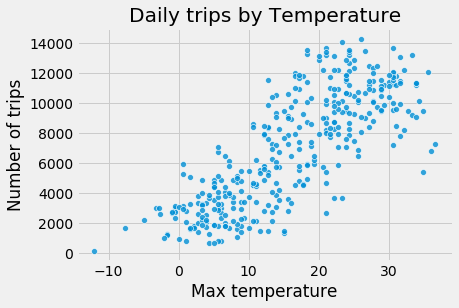

In [65]:
df_group_temp = df_clean.groupby(['date', 'TMAX']).size().reset_index().rename({0:'cnt'}, axis=1)
ax = sns.scatterplot(data=df_group_temp, x='TMAX', y='cnt',alpha=0.8)
ax.set_xlabel('Max temperature')
ax.set_ylabel('Number of trips')
_ =ax.set_title('Daily trips by Temperature')


## Daily trips by temperature - Age groups and gender
The next figure breaks down the information already gathered by the previous plot. Here we see, that this pattern (higher temperatures correlate with higher usage) is valid
for all age groups and for male and female users.

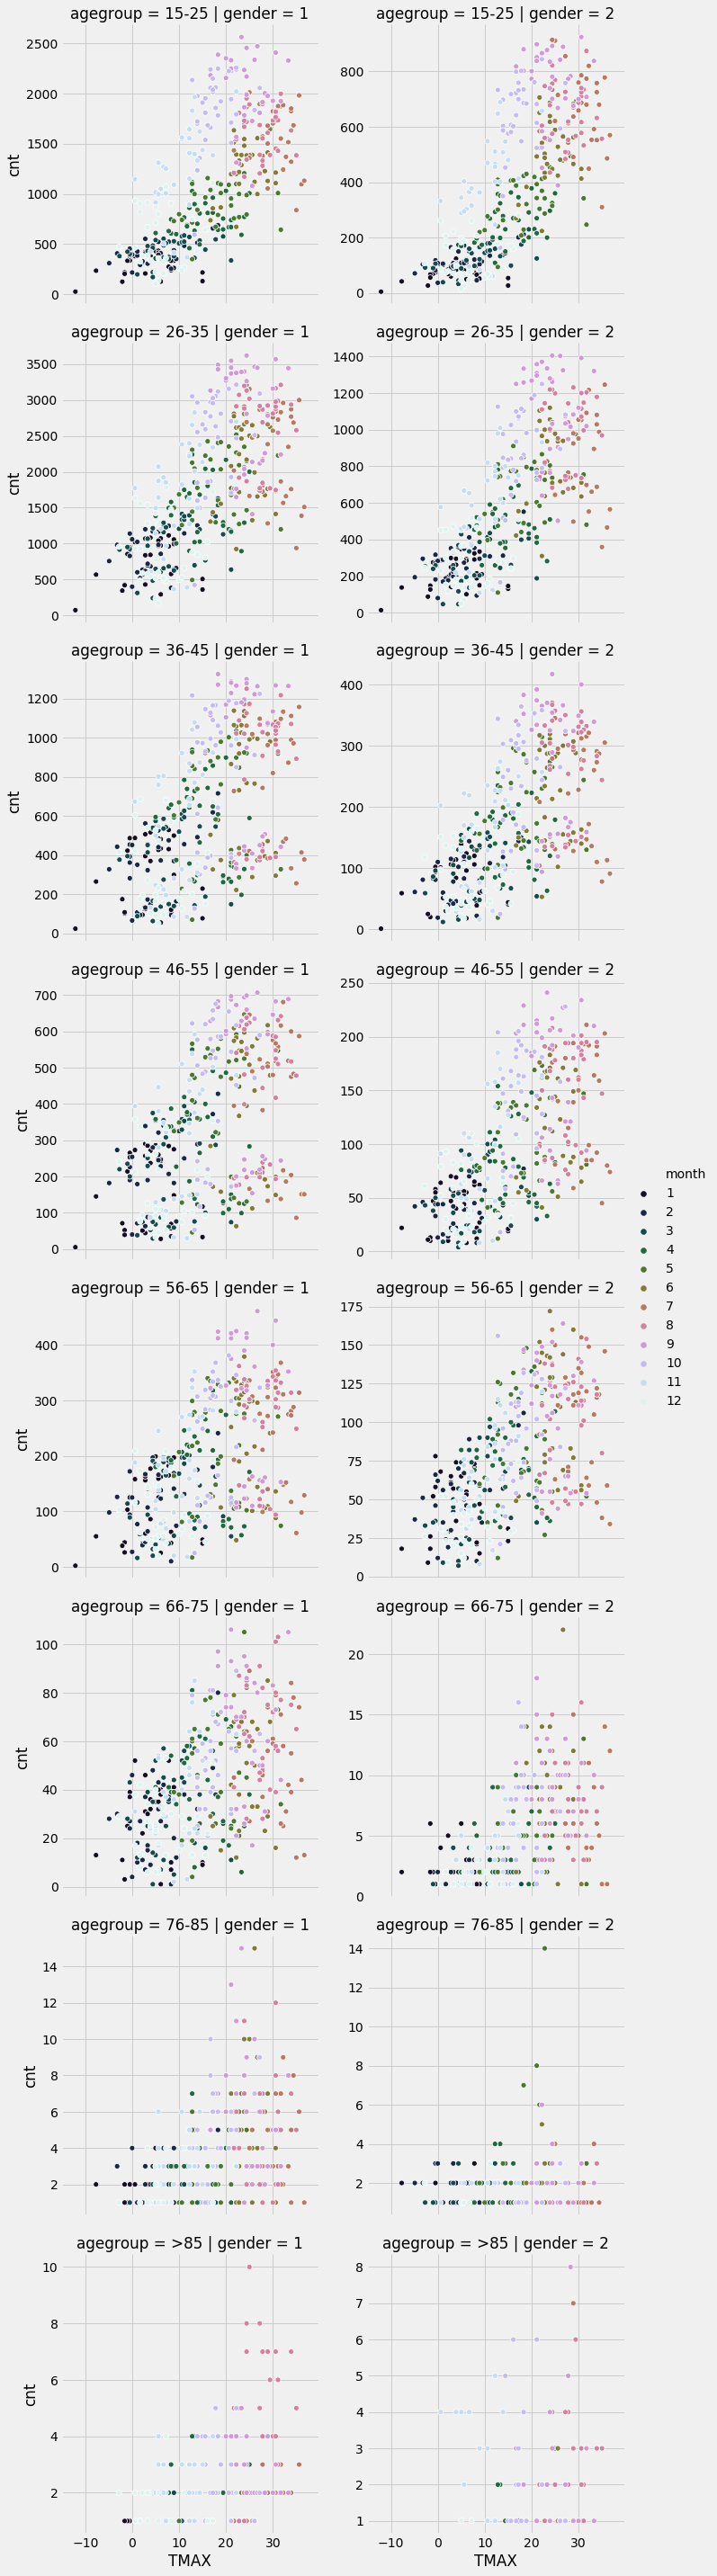

In [68]:
df_group = df_clean[(df_clean.usertype=='Subscriber') & (df_clean.gender.isin([1, 2]))].groupby(['date','TMAX','agegroup','gender', 'month'], observed=True).size().reset_index().rename({0:'cnt'}, axis=1)
_ = sns.relplot(data=df_group, x='TMAX', y='cnt', row='agegroup', col='gender', palette=sns.color_palette("cubehelix", n_colors=12),  hue='month', facet_kws={'sharey': False, 'sharex': True})

## Rain and daily trips
The expectation is that users should be more reluctant to use the bike sharing service when it's rainy outside.
The following figures show the amount of precipitation for the months from April to October and the corresponding
usage of the Bluebikes service beneath. We expect to notice a drop of usage when there was a lot of rain the same
day. And indeed we are able to observe these relationships in a lot of cases. Example dates are: 04/26, 04/27, 05/12 or 10/27. We assume nightly rainfall when
we don't observe an obvious link between the usage rate and the precipitation numbers.

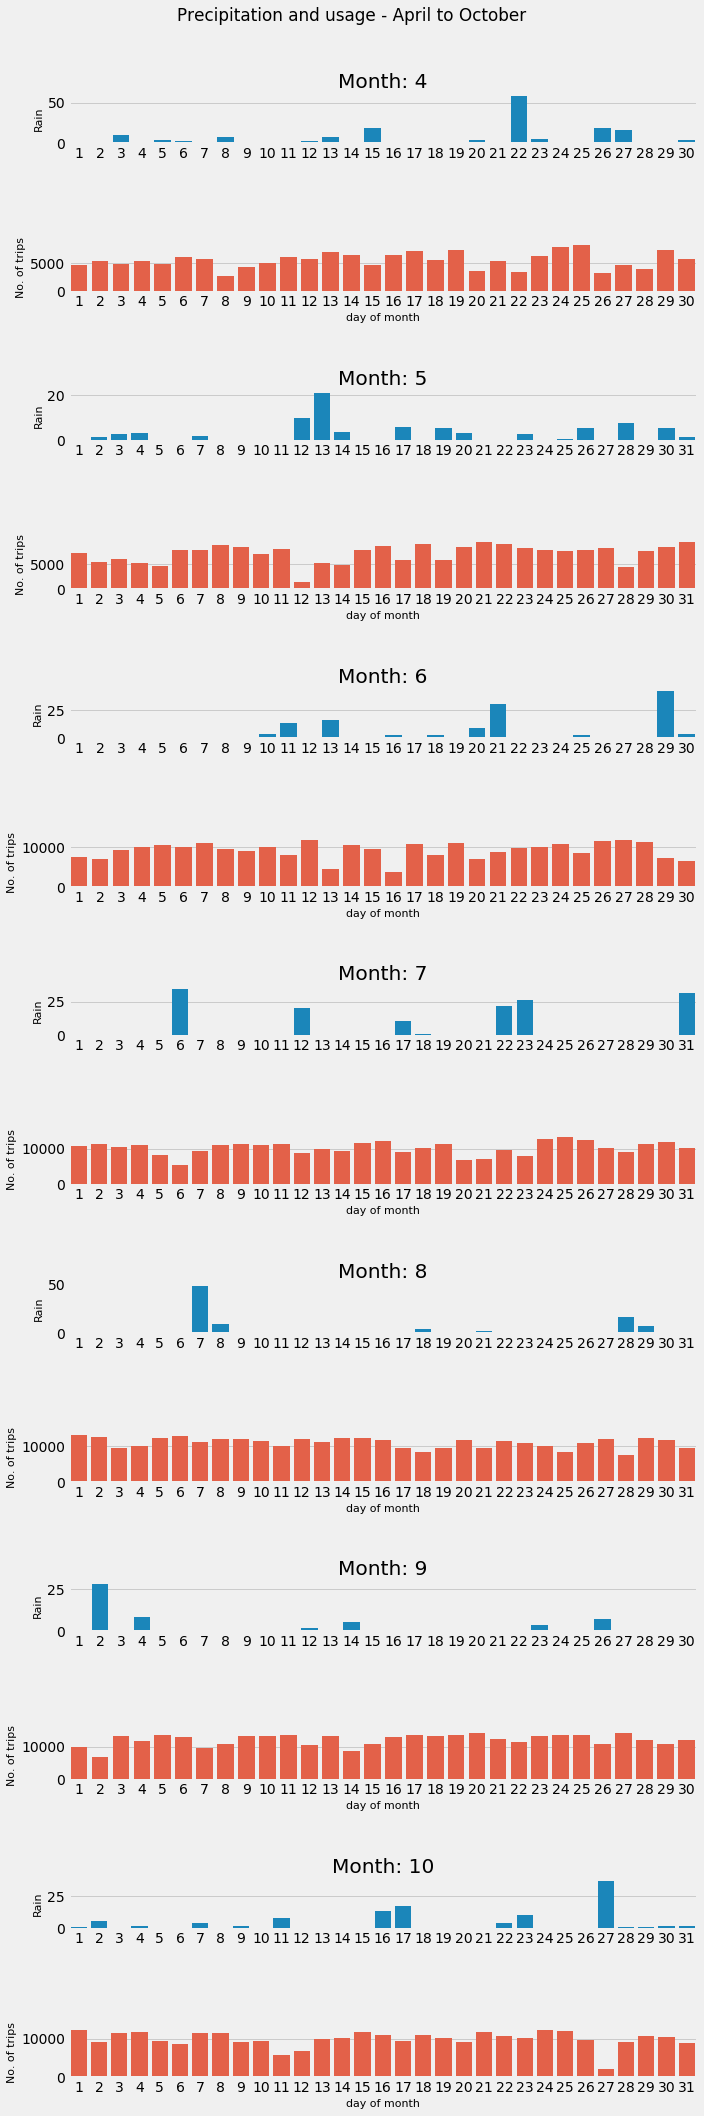

In [75]:
df_rain_days =df_clean[df_clean.month.isin([4, 5, 6, 7, 8, 9, 10])].groupby(['day','month']).agg({'PRCP':'first', 'date':'size'}).reset_index().rename({'date':'index'}, axis=1)
df_rain_days
fig , ax = plt.subplots(14,1,figsize=(10, 30))
for i, m in enumerate(range(4, 11), 1):
    plt.subplot(14, 1, (i-1)*2 + 1)
    #print(m)
    ax1 = sns.barplot(data=df_rain_days[df_rain_days.month==m], x='day', y='PRCP', color='C0')
    ax1.set_title('Month: {}'.format(m))
    ax1.set_xlabel("")
    ax1.set_ylabel('Rain', fontsize=11)
    plt.subplot(14, 1, (i * 2))
    ax2 = sns.barplot(data=df_rain_days[df_rain_days.month==m], x='day', y='index', color='C1')
    ax2.set_ylabel('No. of trips',fontsize= 11)
    ax2.set_xlabel('day of month',fontsize=11)
plt.tight_layout()
plt.subplots_adjust(hspace=2, top=0.94)
_ = plt.suptitle("Precipitation and usage - April to October")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!